In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from src.vae import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('dataset', train=True, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                ), batch_size=batch_size, shuffle=True)


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('dataset', train=False, download=True,
                                transform=torchvision.transforms.ToTensor(),
                                ), batch_size=batch_size, shuffle=True)

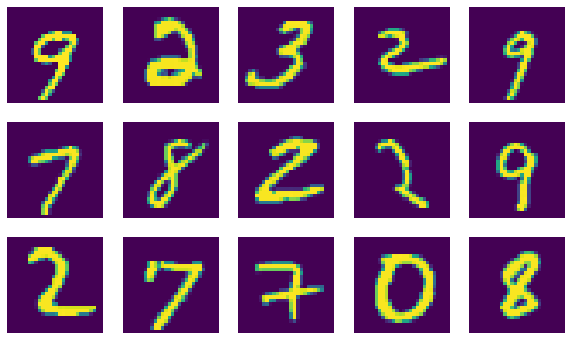

In [4]:
show_mnist(3,5,train_loader)

Epoch 0
Epoch 1
100
loss = 3760.44580078125
original images
reconstruct images


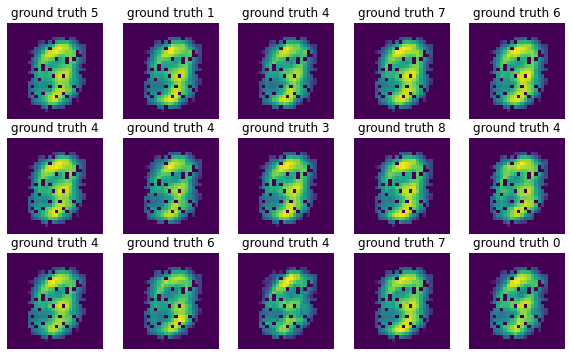

generate synthetic data


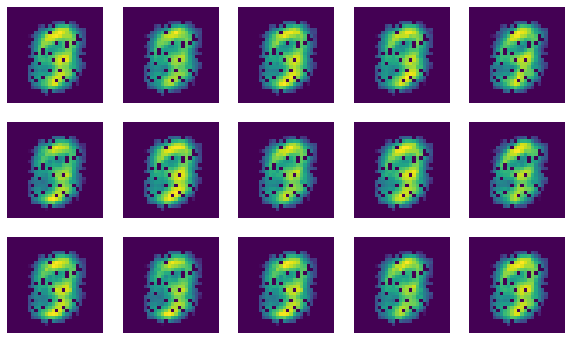

Epoch 2
Epoch 3
Epoch 4
Epoch 5
100
loss = 3684.521484375
original images
reconstruct images


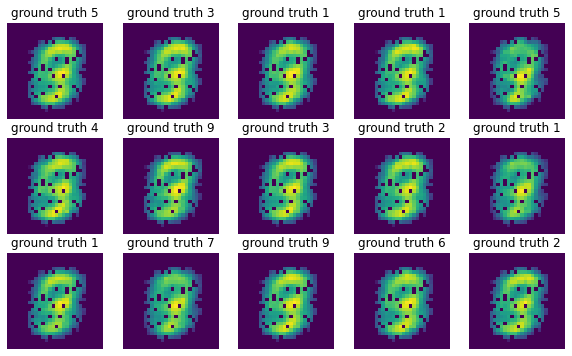

generate synthetic data


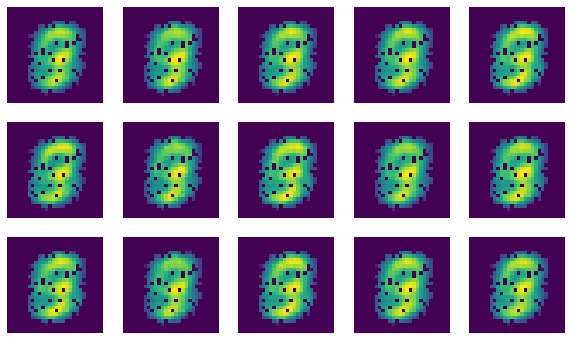

Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
100
loss = 3544.808349609375
original images
reconstruct images


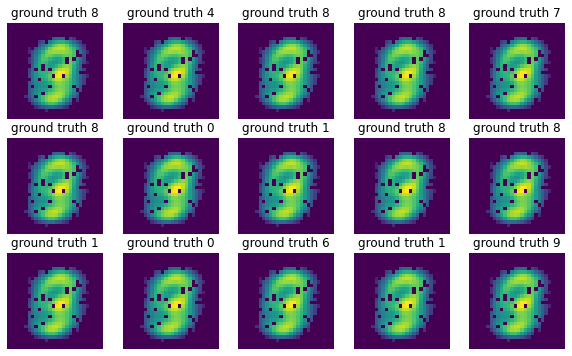

generate synthetic data


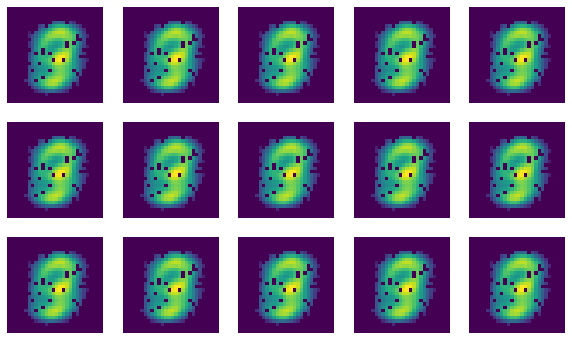

Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
100
loss = 3372.10302734375
original images
reconstruct images


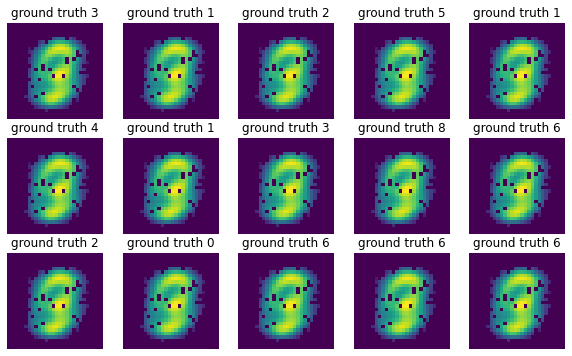

generate synthetic data


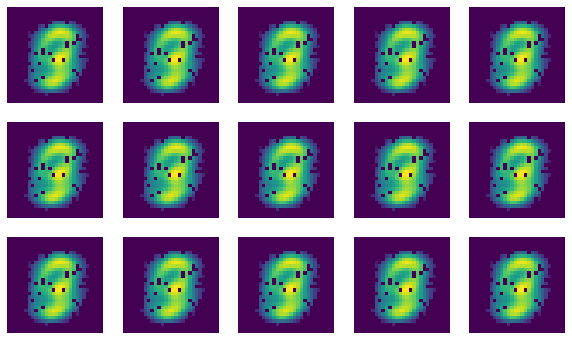

In [5]:
max_epochs = 51
show_step = 100
input_size = 28 * 28
output_size = 28 * 28
latent_dim = 2
en_hidden = 256
de_hidden = 256
gendata_size = 100
vae = VAE(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3)
loss_train=[]
loss_test = []
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for i, batch in enumerate(train_loader):
        x, y = batch
        x = x.view(x.shape[0], -1)
        opt.zero_grad()
        reconstruction, mu, logsigma = vae.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, logsigma).mean(-1)
        loss_train.append(loss)
        loss.backward()
        opt.step()
        if i == show_step and (epoch == 1 or epoch == 5 or epoch == 25 or 
                               epoch == 50) :
            print(i)
            print("loss = {0}".format(loss.item()))
            print("original images")
            print("reconstruct images")
            show_reconstruct_mnist(3, 5, reconstruction, y)
            print("generate synthetic data")
            gen_data = vae.gen_sample_data(gendata_size, latent_dim)
            show_generate_mnist(3, 5, gen_data)
    vae.eval()
    for i, batch_test in enumerate(test_loader):
        x_test, y_test = batch_test
        x_test = x_test.view(x_test.shape[0], -1)
        reconstruction_test, mu_test, logsigma_test = vae.forward_elbo(x_test)
        loss = -vae.loss_function(x_test, reconstruction_test, mu_test, logsigma_test).mean(-1)
        loss_test.append(loss)
    vae.train()

        

Text(0.5, 1.0, 'iteration vs elbo')

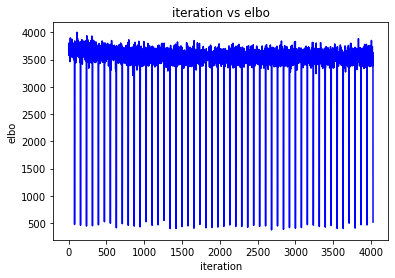

In [6]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")

Text(0.5, 1.0, 'iteration vs elbo')

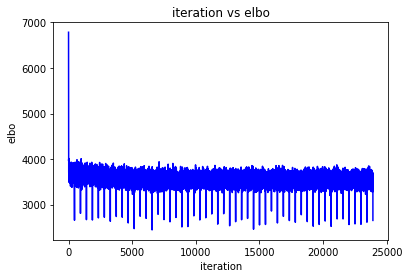

In [7]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")

Epoch 0
Epoch 1
100
loss = 1548.74853515625
original images
reconstruct images


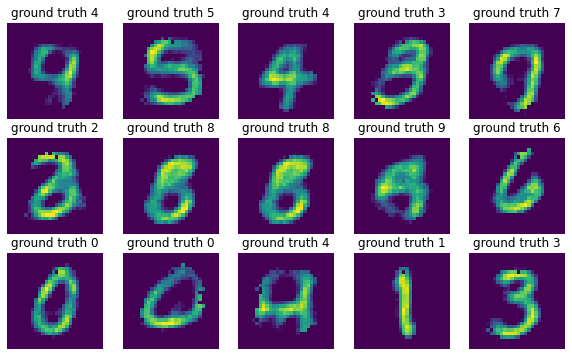

generate synthetic data


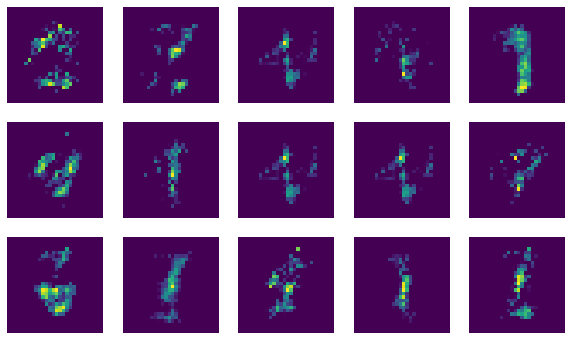

Epoch 2
Epoch 3
Epoch 4
Epoch 5
100
loss = 1377.1632080078125
original images
reconstruct images


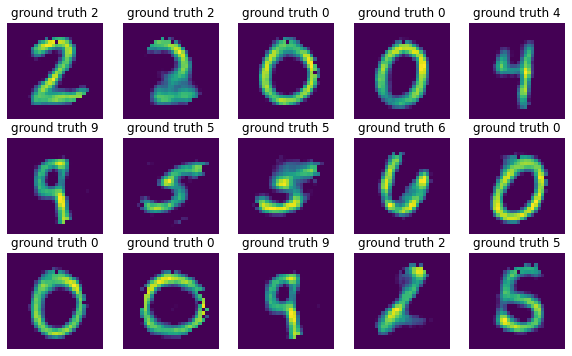

generate synthetic data


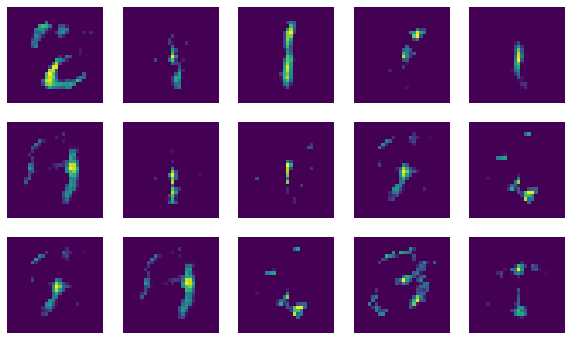

Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
100
loss = 1270.90576171875
original images
reconstruct images


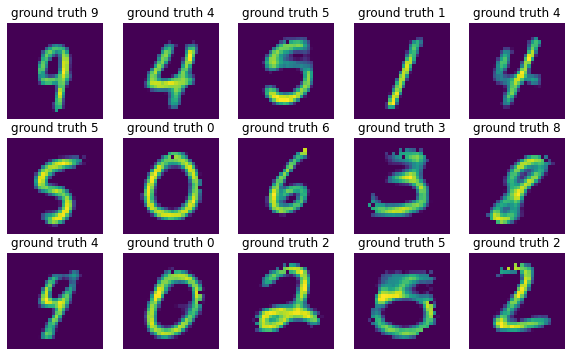

generate synthetic data


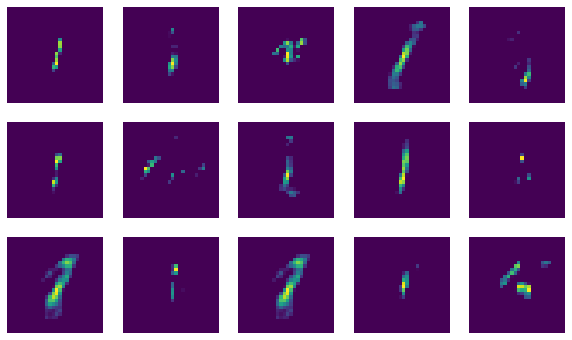

Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30


KeyboardInterrupt: ignored

In [10]:
max_epochs = 51
latent_dim = 32
en_hidden = 256
de_hidden = 256
gendata_size = 100
vae2 = VAE(en_hidden, latent_dim, de_hidden, input_size, output_size)
opt = torch.optim.Adam(vae2.parameters(), lr=1e-3)
loss_train=[]
loss_test = []
for epoch in range(max_epochs):
    print("Epoch {0}".format(epoch))
    for i, batch in enumerate(train_loader):
        x, y = batch
        x = x.view(x.shape[0], -1)
        opt.zero_grad()
        reconstruction, mu, logsigma = vae2.forward_elbo(x)
        loss = -vae.loss_function(x, reconstruction, mu, logsigma).mean(-1)
        loss_train.append(loss)
        loss.backward()
        opt.step()
        if i == show_step and (epoch == 1 or epoch == 5 or epoch == 25 or 
                               epoch == 50) :
            print(i)
            print("loss = {0}".format(loss.item()))
            print("original images")
            print("reconstruct images")
            show_reconstruct_mnist(3, 5, reconstruction, y)
            print("generate synthetic data")
            gen_data = vae2.gen_sample_data(gendata_size, latent_dim)
            show_generate_mnist(3, 5, gen_data)
    vae.eval()
    for i, batch_test in enumerate(test_loader):
        x_test, y_test = batch_test
        x_test = x_test.view(x_test.shape[0], -1)
        reconstruction_test, mu_test, logsigma_test = vae.forward_elbo(x_test)
        loss = -vae.loss_function(x_test, reconstruction_test, mu_test, logsigma_test).mean(-1)
        loss_test.append(loss)
    vae.train()


In [ ]:
plt.plot(np.array(loss_test), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")

In [ ]:
plt.plot(np.array(loss_train), 'b')
plt.xlabel("iteration")
plt.ylabel("elbo")
plt.title("iteration vs elbo")